# **Exploratory Data Analysis**

## **Goal**
1. Investigate top-paying roles and skills in the data science industry.
2. Use Python to explore a real-live dataset on job postings.
3. For job-seekers: use these insights to help find the best job opportunities.

## **Final Deliverables:**
- Create Jupyter Notebookss (showcasing core skills in Python).
- Create a summary page (via README.md) capturing your findings.
- Share this project via GitHub & LinkedIn.

## **Questions to Answer**
1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)

I'll be focusing on AANZFTA (Asean + Australie + New Zealand) Countries Data Analyst roles

## **Exploratory Data Analysis for all Data Roles**

### **Roles to Explore**

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt  
from matplotlib.colors import LinearSegmentedColormap

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

C:\Users\adinr\AppData\Local\Temp\ipykernel_14128\915782166.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='count', y='job_title_short', palette=custom_palette(np.linspace(0, 1, len(df_plot))), legend=False)
C:\Users\adinr\AppData\Local\Temp\ipykernel_14128\915782166.py:13: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=df_plot, x='count', y='job_title_short', palette=custom_palette(np.linspace(0, 1, len(df_plot))), legend=False)


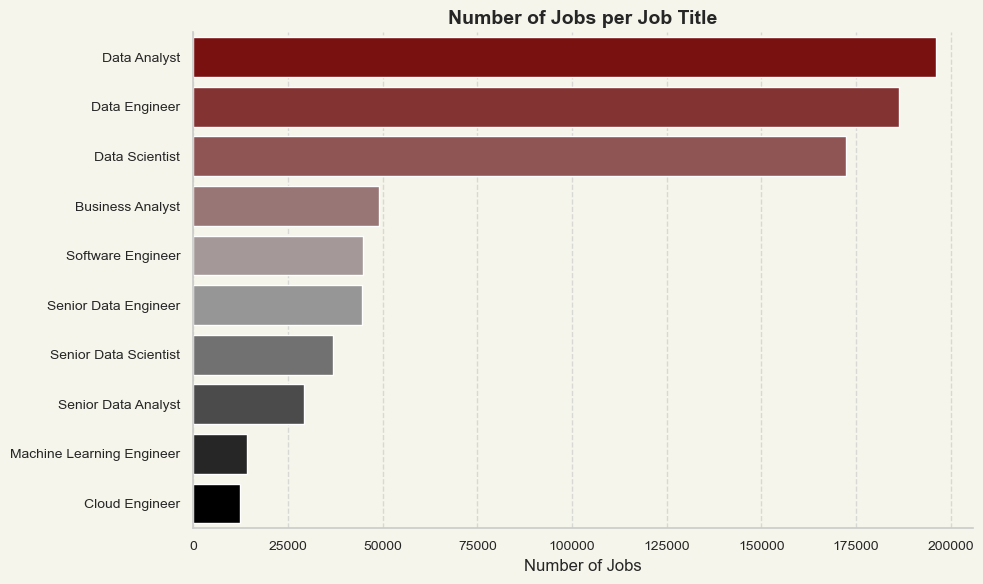

In [2]:
df_plot = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style='whitegrid')
sns.set_palette('muted')

custom_palette = LinearSegmentedColormap.from_list(
    "RedGreyBlack", ["#8B0000", "#A9A9A9", "#000000"], N=10 
)
plt.figure(figsize=(10, 6))
plt.gcf().set_facecolor('#F6F5EB')
plt.rcParams['axes.facecolor'] = '#F6F5EB'

sns.barplot(data=df_plot, x='count', y='job_title_short', palette=custom_palette(np.linspace(0, 1, len(df_plot))), legend=False)
sns.despine()
plt.title('Number of Jobs per Job Title', fontsize=14, weight='bold')
plt.xlabel('Number of Jobs', fontsize=12)
plt.ylabel('')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### **Countries to Explore**

C:\Users\adinr\AppData\Local\Temp\ipykernel_14128\1843062927.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='count', y='job_country', palette=custom_palette(np.linspace(0, 1, len(df_plot))), legend=False)
C:\Users\adinr\AppData\Local\Temp\ipykernel_14128\1843062927.py:9: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=df_plot, x='count', y='job_country', palette=custom_palette(np.linspace(0, 1, len(df_plot))), legend=False)


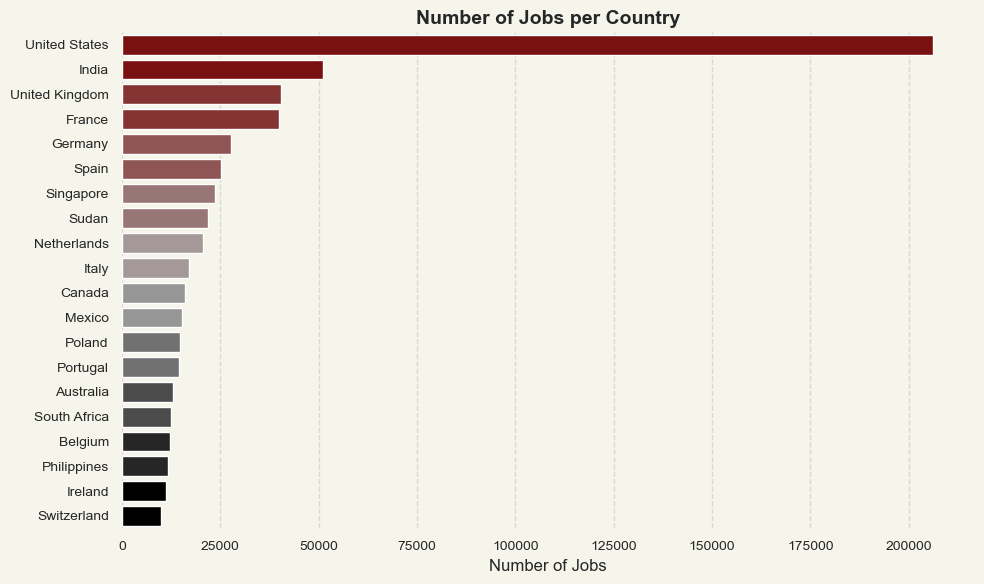

In [3]:
df_plot = df['job_country'].value_counts().to_frame().head(20)

sns.set_theme(style='whitegrid')
sns.set_palette('muted')
plt.figure(figsize=(10, 6))
plt.gcf().set_facecolor('#F6F5EB')
plt.rcParams['axes.facecolor'] = '#F6F5EB'

sns.barplot(data=df_plot, x='count', y='job_country', palette=custom_palette(np.linspace(0, 1, len(df_plot))), legend=False)
sns.despine(left=True, bottom=True)
plt.title('Number of Jobs per Country', fontsize=14, weight='bold')
plt.xlabel('Number of Jobs', fontsize=12)
plt.ylabel('')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### **Companies to Explore**

C:\Users\adinr\AppData\Local\Temp\ipykernel_14128\398413228.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='count', y='company_name', palette=custom_palette(np.linspace(0, 1, len(df_plot))), legend=False)
C:\Users\adinr\AppData\Local\Temp\ipykernel_14128\398413228.py:4: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=df_plot, x='count', y='company_name', palette=custom_palette(np.linspace(0, 1, len(df_plot))), legend=False)


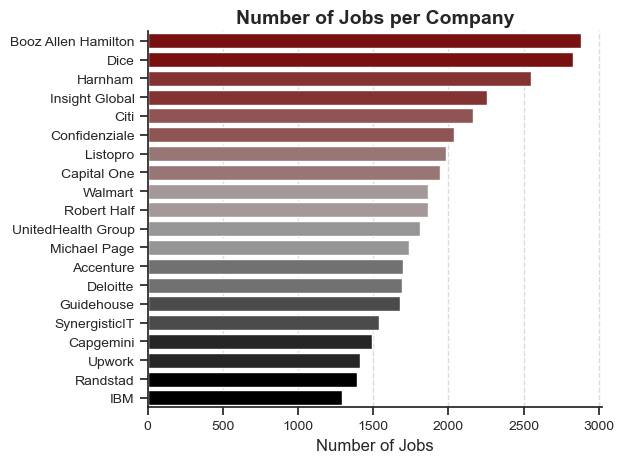

In [4]:
df_plot = df['company_name'].value_counts().to_frame()[1:].head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', palette=custom_palette(np.linspace(0, 1, len(df_plot))), legend=False)
sns.despine()
plt.title('Number of Jobs per Company', fontsize=14, weight='bold')
plt.xlabel('Number of Jobs', fontsize=12)
plt.ylabel('')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

### **Job Opportunities**

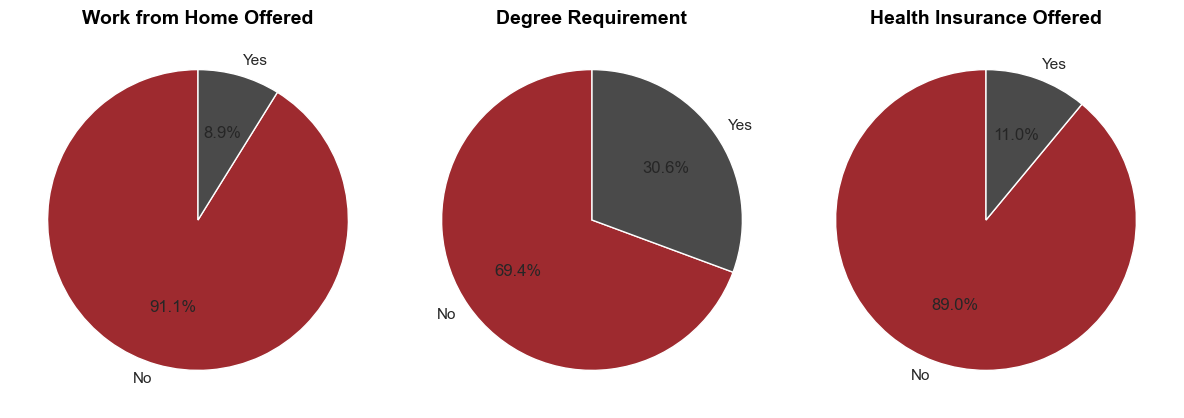

In [5]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

custom_palette1 = ['#9E2A2F', "#4A4A4A"] 


for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, colors=custom_palette1)
    ax[i].set_title(title, fontsize=14, weight='bold', color='black')
    ax[i].tick_params(left=False, right=False, labelleft=False, labelbottom=False)

plt.tight_layout()
plt.show()

### **Exploratory Data Analysis for Data Analysts in the AANZFTA Countries**

In [6]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  
import numpy as np

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### **Filter for AANZFT Data Analyst Roles**

In [7]:
# List of ASEAN countries
asean_countries = [
    'Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 
    'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'
]

# Oceanic countries in the AANZFTA
oceanic_countries = [
    'Australia', 'New Zealand'
]

# Combined list for AANZFTA
aanzfta_countries = asean_countries + oceanic_countries

In [8]:
df_DA_AANZFTA = df[df['job_country'].isin(aanzfta_countries) & (df['job_title_short'] == 'Data Analyst')]

### **Locations to Explore:**

In [9]:
from matplotlib.colors import LinearSegmentedColormap

C:\Users\adinr\AppData\Local\Temp\ipykernel_14128\113989633.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot,
C:\Users\adinr\AppData\Local\Temp\ipykernel_14128\113989633.py:18: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=df_plot,


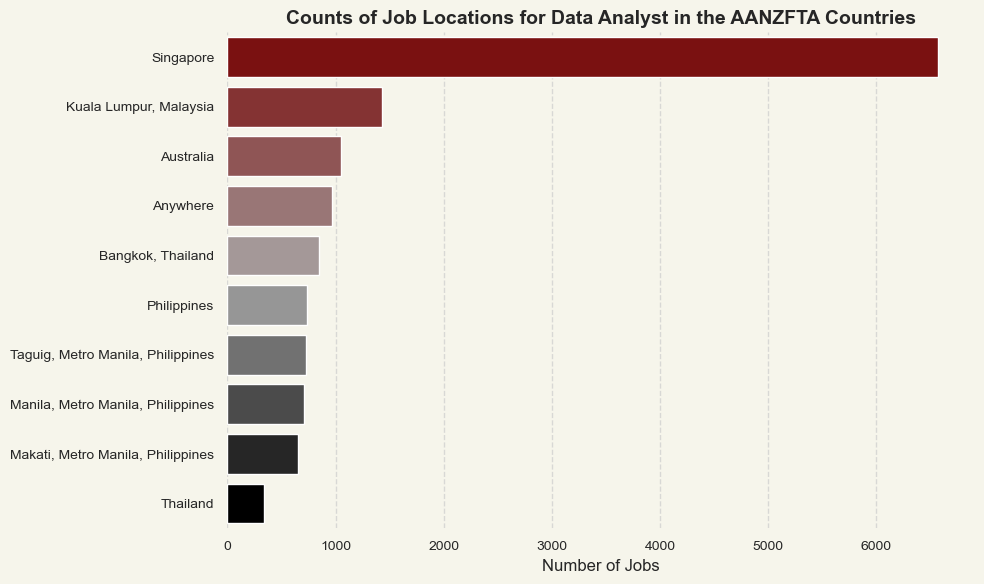

In [10]:
df_plot = df_DA_AANZFTA['job_location'].value_counts().head(10).reset_index()
df_plot.columns = ['job_location', 'count']


df_plot['job_location'] = df_plot['job_location'].replace(
    {'Kuala Lumpur, Federal Territory of Kuala Lumpur, Malaysia': 'Kuala Lumpur, Malaysia'}
)

sns.set_theme(style='whitegrid')
sns.set_palette('muted')

custom_palette = LinearSegmentedColormap.from_list(
    "RedGreyBlack", ["#8B0000", "#A9A9A9", "#000000"], N=10 
)
plt.figure(figsize=(10, 6))
plt.gcf().set_facecolor('#F6F5EB')
plt.rcParams['axes.facecolor'] = '#F6F5EB'
sns.barplot(data=df_plot, 
            x='count', 
            y='job_location',
            palette=custom_palette(np.linspace(0, 1, len(df_plot))), 
            legend=False
)
sns.despine(left=True, bottom=True)

plt.title('Counts of Job Locations for Data Analyst in the AANZFTA Countries', fontsize=14, weight='bold')
plt.xlabel('Number of Jobs', fontsize=12)
plt.ylabel('')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### **Job Opportunities**

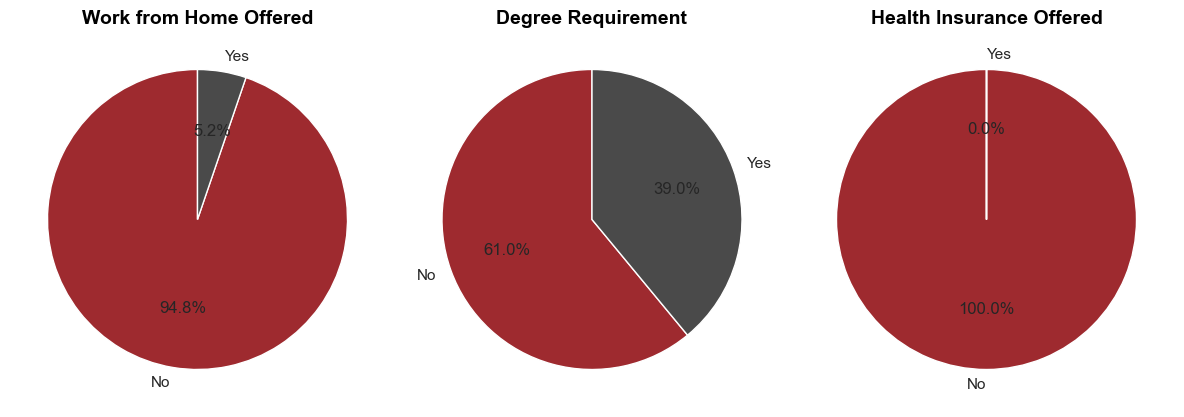

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

sns.set_theme(style="ticks")  
plt.rcParams['axes.facecolor'] = '#F6F5EB'  


fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))


custom_palette = ['#9E2A2F', "#4A4A4A"] 


for i, (column, title) in enumerate(dict_column.items()):
   
    ax[i].pie(df_DA_AANZFTA[column].value_counts(),
              labels=['No', 'Yes'],  
              autopct='%1.1f%%', 
              startangle=90,
              colors=custom_palette1)  
    ax[i].set_title(title, fontsize=14, weight='bold', color='black') 

   
    ax[i].tick_params(left=False, right=False, labelleft=False, labelbottom=False)

plt.tight_layout()
plt.show()


### **Companies to Explore:**

C:\Users\adinr\AppData\Local\Temp\ipykernel_14128\2657360544.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='count', y='company_name', palette=custom_palette(np.linspace(0, 1, len(df_plot))), legend=False)
C:\Users\adinr\AppData\Local\Temp\ipykernel_14128\2657360544.py:10: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=df_plot, x='count', y='company_name', palette=custom_palette(np.linspace(0, 1, len(df_plot))), legend=False)


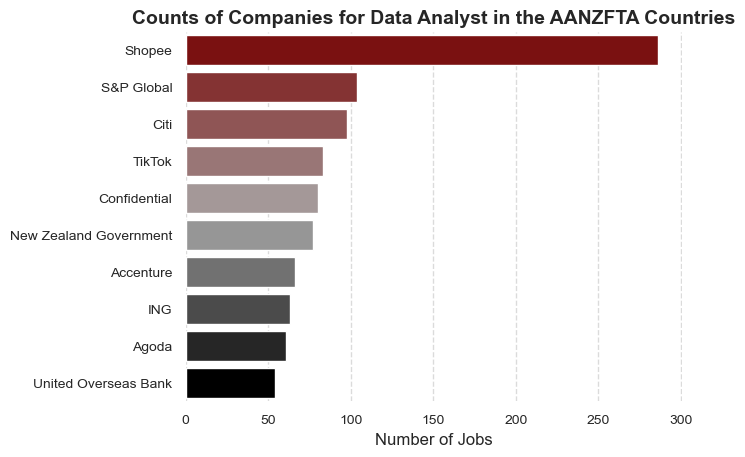

In [12]:
df_plot = df_DA_AANZFTA['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='whitegrid')
sns.set_palette('muted')

custom_palette = LinearSegmentedColormap.from_list(
    "RedGreyBlack", ["#8B0000", "#A9A9A9", "#000000"], N=10 
)

sns.barplot(data=df_plot, x='count', y='company_name', palette=custom_palette(np.linspace(0, 1, len(df_plot))), legend=False)
sns.despine(left=True, bottom=True)
plt.title('Counts of Companies for Data Analyst in the AANZFTA Countries', fontsize=14, weight='bold')
plt.xlabel('Number of Jobs', fontsize=12)
plt.ylabel('')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()